1.3. Pruebas de aleatoriedad

ENUNCIADO

1. Uniformidad en los resultados de Baloto

En el baloto se sacan cinco bolitas sin reemplazo de una urna que contiene 43 bolitas y una sexta bolita (la súperbolita) de una urna que tiene 16. El orden en que salgan las cinco primeras bolitas no importa, pero la sexta bolita sí paga por la posición. Las reglas para jugar el baloto se pueden consultar en https://www.colombialoterias.com/baloto/info.

¿Hay algún número con mayor probabilidad de salir en las balotas normales y en la superbolita?

### 1.Planteamiento de hipotesis

La prueba es:

H0 : los números se distribuyen uniformemente

H1 : los números no se distribuyen uniformemente

y no se puede rechazar  H0  si  χ0≤χ2M−1

In [ ]:
import random 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

# importar datos de baloto
# los datos están en un archivo local
# llamado baloto_2019_2021.csv

from google.colab import files
datos_a_leer = files.upload()

Saving SUPERBOLITA-2017-2022.csv to SUPERBOLITA-2017-2022.csv


In [ ]:
#Para saber como se llama el archivo
for fn in datos_a_leer.keys():
  print('Usuario subió archivo "{name}" de longitud {length} bytes'.format(name=fn, length=len(datos_a_leer[fn])))

Usuario subió archivo "SUPERBOLITA-2017-2022.csv" de longitud 1668 bytes


In [ ]:
import io
datos=pd.read_csv(io.BytesIO(datos_a_leer['SUPERBOLITA-2017-2022.csv']))
#datos= pd.read_csv("baloto.txt", sep= ",", header = None)
print (datos)

     11
0    15
1    14
2     4
3    15
4     3
..   ..
477  10
478   6
479   1
480  14
481  10

[482 rows x 1 columns]


In [ ]:
# resbal contiene los resultados posibles
# resbal = 1, 2, 3, 4, ... ,16
# Para definir a resbal se usa la función range()
# range(a,b) produce una secuencia de enteros en [a,b)

resbal=range(1,17)

# convertir la secuencia de datos a un array de numpy

auxd=datos.to_numpy()
numd=len(auxd)
print("num-datos=",numd)


num-datos= 482


In [ ]:
cuenta=np.zeros(16)
for i in resbal:
      aux=np.sum(auxd==i)
      cuenta[i-1]=aux
print(cuenta)

cuneta1=[]
for i in resbal:
  

[26. 37. 33. 30. 28. 24. 37. 27. 22. 26. 45. 24. 42. 26. 20. 35.]


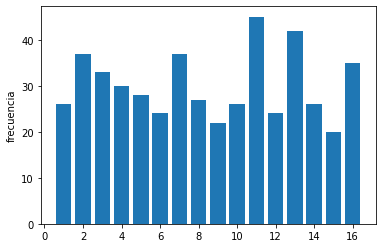

In [ ]:
plt.bar(resbal,cuenta)
plt.ylabel('frecuencia')
plt.show()

In [ ]:
ei=numd/16
print("N=",numd, "frecuencia esperada=", ei)
chisq = (cuenta-ei)**2/ei
print(chisq)
chio =np.sum(chisq)
print("Estadístico de prueba Chi2=",chio)
# el valor crítico de Chi2 para un nivel de confianza del 95% se encuentra así:
# alfa = 0.05 (p=0.95), y M-1 grados de libertad = (16-1)
from scipy.stats import chi2
chic=scipy.stats.chi2.ppf(0.95, 15)
print("Estadístico crítico Chi2(0.05,15)=",chic)

N= 482 frecuencia esperada= 30.125
[5.64834025e-01 1.56898340e+00 2.74377593e-01 5.18672199e-04
 1.49896266e-01 1.24533195e+00 1.56898340e+00 3.24170124e-01
 2.19139004e+00 5.64834025e-01 7.34491701e+00 1.24533195e+00
 4.68101660e+00 5.64834025e-01 3.40300830e+00 7.88900415e-01]
Estadístico de prueba Chi2= 26.481327800829874
Estadístico crítico Chi2(0.05,15)= 24.995790139728616


CONCLUCION

como el estadistico de prueba es mayor que el estadistico critico se concluye que  se puede rechazar la hipotesis h0 y por ende los datos se distribuyen no uniformemente